In [1]:
import numpy as np
import pylab as pl
from astropy.io import fits
from skimage import exposure
from matplotlib import cm
cmap = cm.get_cmap('gray')
import time
%matplotlib inline


ModuleNotFoundError: No module named 'skimage'

In [2]:
PATH = 'data/img_HR8799_dc.fits'
OUTFILENAME = 'sasha_data_small'
data = fits.open(PATH)

In [10]:
print(np.shape(data[0].data))
cube = data[0].data
Nframes = len(cube[:,0,0])
Ny  = 64
Nx  = 64

# ylow = 325
# xlow = 550

ylow = 425
xlow = 700

cube_cut = np.zeros((Nframes,Nx,Ny))
for i in range(Nframes):
    cube_cut[i,:,:] = cube[i,ylow:ylow+Ny,xlow:xlow+Nx]

(94, 1024, 1024)


0.0
0.0
nan
nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:916: UserWarning: Warning: convert

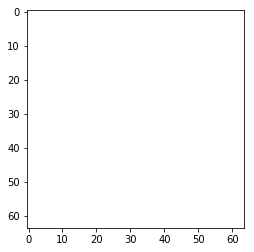

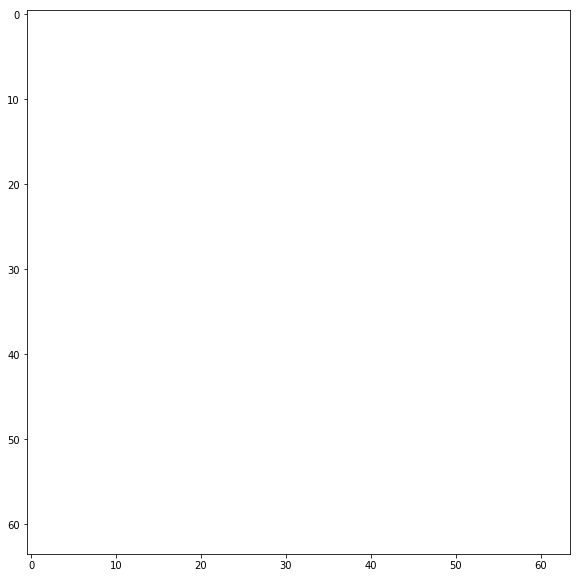

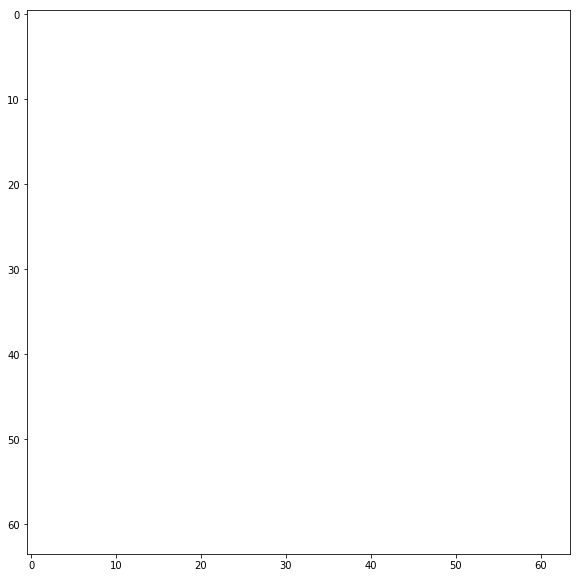

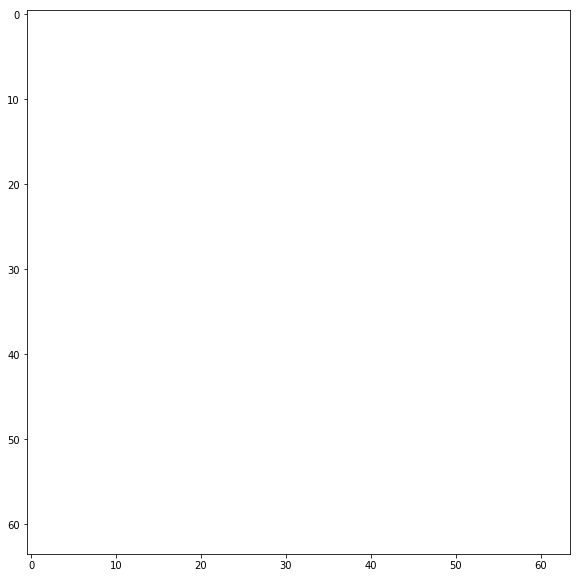

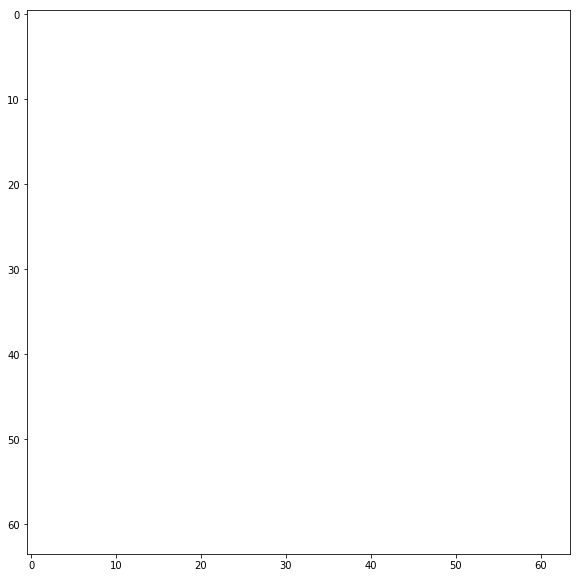

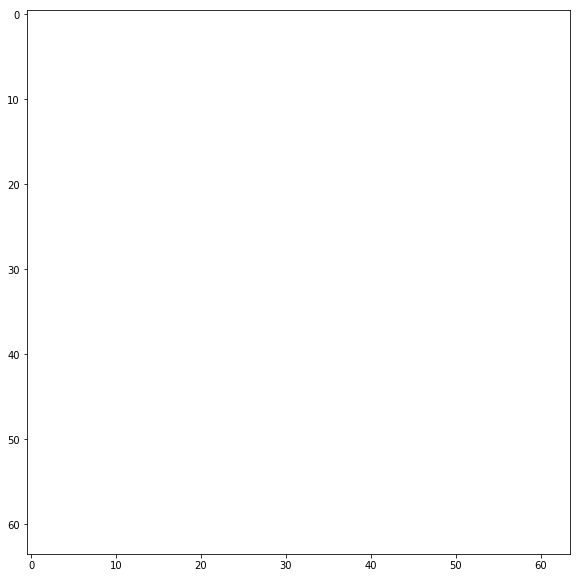

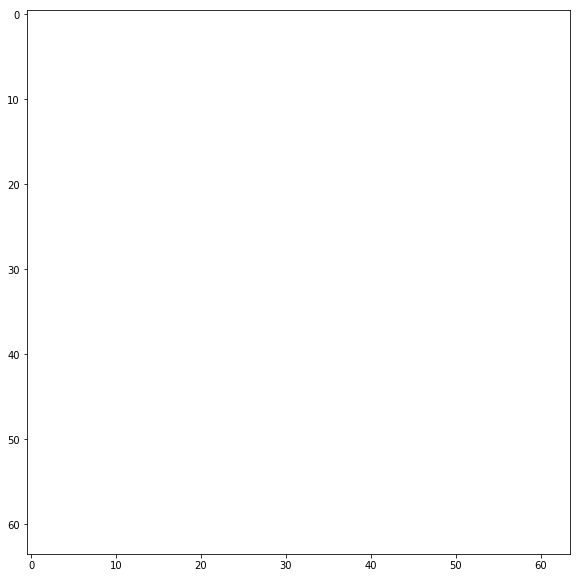

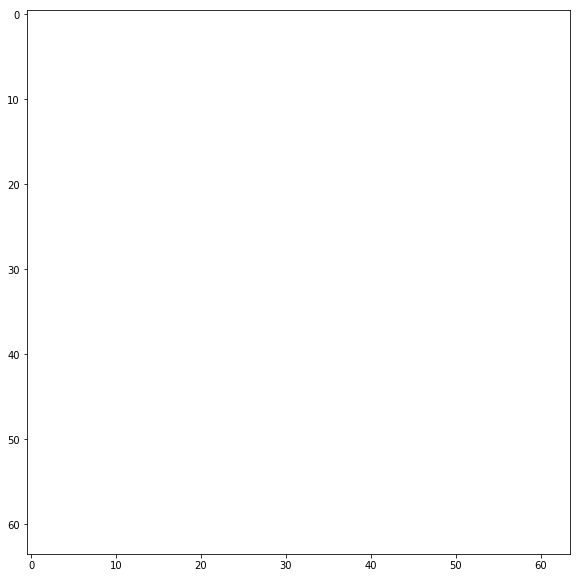

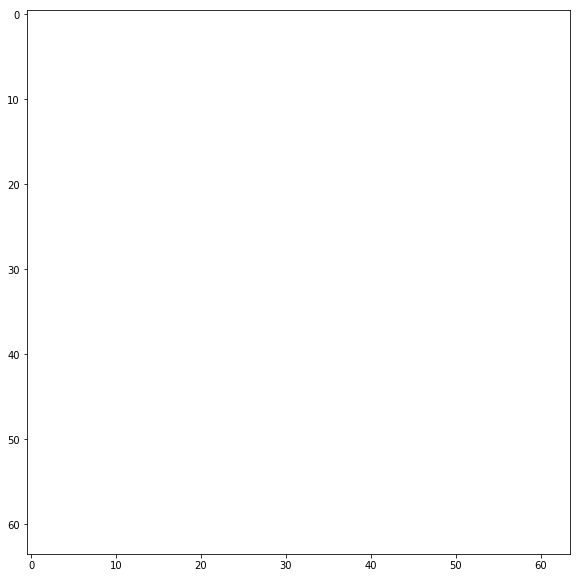

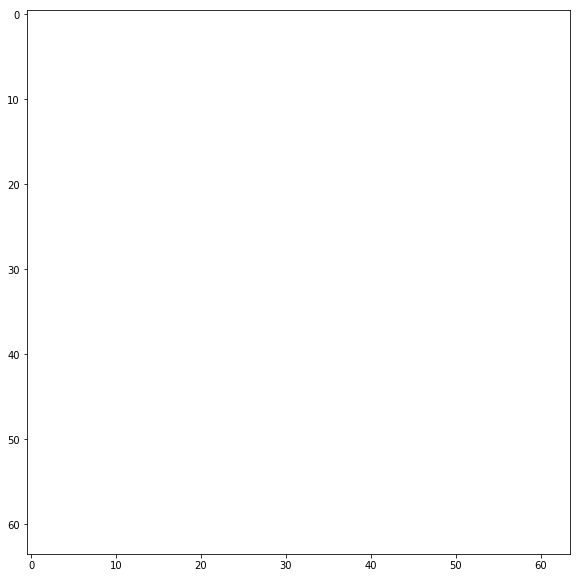

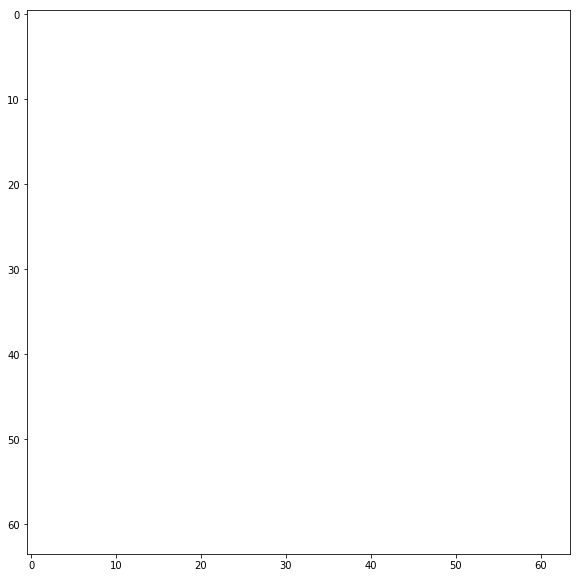

In [11]:
#normalising the data 

print(np.min(cube_cut))
print(np.max(cube_cut))

cube_cut -= np.min(cube_cut)
cube_cut /= np.max(cube_cut)

print(np.min(cube_cut))
print(np.max(cube_cut))

# ble = (cube[0,:,:]-min1)*(((max2-min2)/(max1-min1))+min2)
ble = cube_cut[0,:,:]

p2 = np.percentile(ble, 0.2)
p98 = np.percentile(ble, 99.8)
img_rescale = exposure.rescale_intensity(ble, in_range=(p2, p98))

pl.imshow(cube_cut[0,:,:], cmap=cmap)

# # pl.ion()
for i in range(10):
    pl.figure(figsize=(10,10))    
    img_rescale = exposure.rescale_intensity(cube_cut[i,:,:], in_range=(p2, p98))
    pl.imshow(img_rescale, cmap=cmap)
#     # pl.draw()
#     # time.sleep(1)
    

In [8]:
np.save(OUTFILENAME, cube_cut)